# Multinomial data 01

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-03-25)_

## Election forecasting problems

Bayesian statistics is the natural method of blending prior information (from previous polls or elections) with current results, either from an isolated survey or from a sequence of surveys taken at regular intervals  _(tracking)_ approaching election day. In the simplest setting, in a given district, the vector of number of votes cast for the $m$ political parties contesting in a multi-party election follows an $m$-dimensional multinomial distribution. Hence we consider problems in analysis of election-related data as representative of Bayesian treatment for the multinomial distribution.

Realistically forecasting vote counts requires many data analytical techniques, including methods for aggregating results from diverse electoral districts and supervised learning methods to take into account other sources of information and/or variability such as socio-economical factors and geo-spatial influences. Political representation systems transforming number of votes into actual final results, such as number of seats in a Parliament modulated by d'Hondt rule as in Spanish elections or electoral votes in the US presidential elections, add an additional layer of complexity. In any case, election forecasting offers an ample field for Data Scientists.

Several aspects of these problems were treated in a monographic Elections issue in the journal _Statistical Science,_ number 4 in volume 17 (2002). Another Special Section in this same journal, volume 26, number 4 (2011) is devoted to 
Election Forensics and the 2004 Venezuelan Presidential Recall Referendum.
	
### USA presidential elections

A readable paper (about the 2008 election) is:	Rigdon, Steven E. et al. (2009) _A Bayesian Prediction Model for the U.S. Presidential Election,_ American Politics Research, Vol. 37, Num. 4, 700-724. This paper considers a $m=4$-wise partition of the electoral space in groups: $i=1$, voters for the Republican candidate, $i=2$, voters for the Democratic party, $i=3$, aggregated voters for all remaning parties and $i=4$, undecided. 

### Spanish general and regional elections

In the blog by [Virgilio Gómez Rubio - Universidad de Castilla-La Mancha](https://becarioprecario.github.io/)
there are several analyses of Spanish election data, both general and from autonomous regions, using the Dirichlet-Multinomial model. He includes some datasets and segments of the code used.

### The following case studies

The first two Case Studies below are textbook examples: Case Study 1 is taken from Gelman _et al._ (2013), _BDA3,_ pp. 69-70, and Case Study 2 comes from Jim Albert (2009), _Bayesian Computations with R (2nd ed)_ pp. 66-69. Case Study 3 is based on [C. W. Stevenson](https://statistical-research.com/)'s paper _Probability-Based Estimation and the 2012 Presidential Election Exit Poll_ with code in [R-Bloggers](https://www.r-bloggers.com/r-code-for-election-posterior-distribution-from-a-random-sample/). 

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-03-25)_

# The Dirichlet-Multinomial model

Generalizes the Beta-Binomial conjugate pair.

The Dirichlet distribution is the multivariate Beta. The Multinomial distribution is the multivariate Binomial.

### Multivariate Bernoulli distribution

A partition $\Omega=A_{1}\sqcup\cdots\sqcup A_{m}$, where the $A_{j}$ are
pairwise exclusive events whose union is the total space, and:

$$
    \theta=(\theta_{1},\dots,\theta_{m}),
    \quad\theta_{j}=\prob(A_{j}), \mskip40mu 1\leq j\leq m.
$$

Each indicator

$$
    1_{A_{j}}\sim\textrm{Bern}(\theta_{j})\mskip40mu 1\leq j\leq m.
$$

The $m$-dimensional vector of indicators:

$$
    (1_{A_{1}},\dots,1_{A_{m}}),
$$

follows  an $m$-dimensional _multivariate Bernoulli_ distribution with vector of probabilities:
    
$$
    \theta=(\theta_{1},\dots,\theta_{m}),
$$

The sum of the $m$ probabilities is $1$. The sum of the $m$ indicators is $1$  _(Cannot be independent!!)._

Each $j$-th marginal, $1_{A_{j}}\sim\textrm{Bern}(\theta_{j})$.

$$
\begin{align*}
    &\Ee(1_{A_{j}})=\theta_{j},
    &\mskip-70mu\var(1_{A_{j}})=\theta_{j}\,(1-\theta_{j}),\\[0.4cm]
    &\cov(1_{A_{j}},1_{A_{k}})=-\theta_{j}\,\theta_{k},  \mskip40mu j\neq k.
\end{align*}
$$

## The multinomial distribution

An $m$-dimensional vector $x=(x_{1},\dots,x_{m})$, of integers $x_{j}\in[0,n]$ such that $\sum_{j=1}^{m}x_{j}=n$
has an $m$-dimensional multinomial distribution of size $n$ and vector of probabilities 
$\theta=(\theta_{1},\dots,\theta_{m})$, $\theta_{j}\in[0,1]$,  such that $\sum_{j=1}^{m}\theta_{j}=1$, if it has
the joint pmf:

$$
    \dfrac{n!}{x_{1}!\cdot\cdots\cdot x_{m}!}\,
    \theta_{1}^{x_{1}}\cdot\cdots\cdot \theta_{m}^{x_{m}}.
$$

$x\sim\textrm{Multinomial}(\theta)$. Such vector $x$ is the sum of $n$ $m$-dimensional vectors i.i.d. $\sim\textrm{Bern}(\theta)$.

### The Dirichlet distribution

$\theta$'s joint pdf, with parameters $a=(a_{1},\dots,a_{m})$, $a_{i}>0$:

$$
    h(\theta_{1},\dots,\theta_{m};a_{1},\dots,a_{m})=
    \frac{1}{\text{B}(a)}\,\prod_{i=1}^{m} \theta_{i}^{a_{i}-1}, \mskip15mu\text{where}
$$
$$
    \operatorname{B}(a)=\frac{\prod_{i=1}^{m}\Gamma(a_{i})}{\Gamma\left(\sum_{i=1}^{m}a_{i}\right)}
    \mskip20mu\text{is the multivariate Beta function.}
$$

### Multinomial likelihood with Dirichlet prior

$$
    \text{If:}\mskip12mu(x|\theta)\equiv (x_{1},\dots,x_{m}\CondTo\theta_{1},\dots,\theta_{m})\sim\textrm{Multinomial}(n,\theta),
$$ 

with parameter vector:

$$
    \theta=(\theta_{1},\dots,\theta_{m}),\;\;0<\theta_{i}<1,\;\; 1\leq i \leq m,\;\;\textstyle\sum_{i=1}^{m}\theta_{i}=1,
$$

and $\theta$'s joint prior is Dirichlet with parameters $a=(a_{1},\dots,a_{m})$, then $\theta$'s posterior is Dirichlet,
with parameters: 
$$
   a+x=(a_{1}+x_{1},\dots,a_{m}+x_{m}).
$$

# Case study 1: US 1988 election

Example from: Albert (2009), _Bayesian Computation with R,_ 2ed, p. 66, and Gelman et al (2013) _BDA3,_ p. 69.

## Data and context

In late October, 1988, a survey was conducted by CBS News of 1447 adults in the United States to find out their preferences in the upcoming presidential election. Out of $n=1447$ persons, $y_1=727$ supported George H. Bush, $y_2=583$
supported Michael Dukakis, and $y_3=137$ supported other candidates or expressed no opinion. 

Assuming no other information on the respondents, the 1447 observations are exchangeable. If we also assume simple random sampling (that is, 1447 names "drawn out of a hat"), then the data $\mathbf{y}=(y_1, y_2, y_3)$, $y_1+y_2+y_3=n$, follow a multinomial distribution, with parameters $n$ and $\boldsymbol{\theta}=(\theta_1,\theta_2,\theta_3)$, with $\theta_1+\theta_2+\theta_3=1$, the proportions of Bush supporters, Dukakis supporters, and those with no opinion in the survey population.

An estimand of interest is $\theta_1−\theta_2$, the population difference in support for the two major candidates.

In [1]:
n<-1447
y1<-727
y2<-583
y3<-137
y<-c(y1,y2,y3)
sum(y)

[1] 1447

## Prior distribution

A Dirichlet distribution with parameters $\boldsymbol{\alpha}=(\alpha_1,\alpha_2,\alpha_3)$:

$$
    h(\boldsymbol{\theta}\,|\,\boldsymbol{\alpha})\propto \boldsymbol{\theta}^{\boldsymbol{\alpha}}
    \equiv\theta_1^{\alpha_1-1}\cdot\theta_2^{\alpha_2-1}\cdot\theta_3^{\alpha_3-1},
    \quad \theta_1, \theta_2, \theta_3 \in(0,1), \quad \theta_1+\theta_2+\theta_3=1.
$$

This prior distribution is mathematically equivalent to a likelihood resulting from $a=\alpha_1+\alpha_2+\alpha_3$ observations with $\alpha_j$ observations of the $j$-th outcome category. 

As in the binomial there are several plausible noninformative Dirichlet prior distributions. 

1. A (three-dimensional) uniform density is obtained by setting $\alpha_j=1$ for all $j$; this distribution assigns equal density to any vector $\boldsymbol{\theta}$ satisfying $\theta_1+\theta_2+\theta_3=1$. 

2. Setting $\alpha_j = 0$ for all $j$ results in an improper prior distribution that is uniform in the $\log(\theta_j)$’s. The resulting posterior distribution is proper if there is at least one observation in each of the $k=3$ categories, so that each component of $\mathbf{y}$ is positive.

Here we use the uniform prior:

In [2]:
alpha.prior<-c(1,1,1)

#### Posterior distribution

In [3]:
alpha.post<-alpha.prior+y

#### Simulate $\theta_1-\theta_2$ and summarize results

In [4]:
## One of these, to have the 'rdirichlet()' function
#
install.packages("LearnBayes", dependencies=TRUE)
require(LearnBayes)
install.packages("extraDistr", dependencies=TRUE)
require(extraDistr)

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"installing the source package 'LearnBayes'

Loading required package: LearnBayes
Warning message:
"dependencies 'VGAM', 'actuar' are not available"also installing the dependencies 'pillar', 'vctrs', 'pkgbuild', 'tibble', 'brio', 'callr', 'cli', 'digest', 'jsonlite', 'lifecycle', 'magrittr', 'pkgload', 'processx', 'ps', 'rlang', 'waldo', 'testthat'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'vctrs' 'tibble' 'brio' 'cli' 'digest'
  'jsonlite' 'magrittr' 'processx' 'ps' 'rlang' 'testthat' 'extraDistr'


  These will not be installed


installing the source packages 'pillar', 'pkgbuild', 'callr', 'lifecycle', 'pkgload', 'waldo'

Warning message in install.packages("extraDistr", dependencies = TRUE):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("extraDistr", dependencies = TRUE):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("extraDistr", dependencies = TRUE):
"installation of package 'waldo' had non-zero exit status"Warning message in install.packages("extraDistr", dependencies = TRUE):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages("extraDistr", dependencies = TRUE):
"installation of package 'pkgbuild' had non-zero exit status"Warning message in install.packages("extraDistr", dependencies = TRUE):
"installation of package 'pkgload' had non-zero exit status"Loading required package: extraDistr
Warning message:
"package 'extraDistr' was built under R version 3.6.3"
Attach

In [5]:
N<-10000
theta<-rdirichlet(N,alpha.post)

In [6]:
# Compute differences
D<-theta[,1]-theta[,2]
summary(D)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01047 0.08333 0.10003 0.09966 0.11646 0.19659 

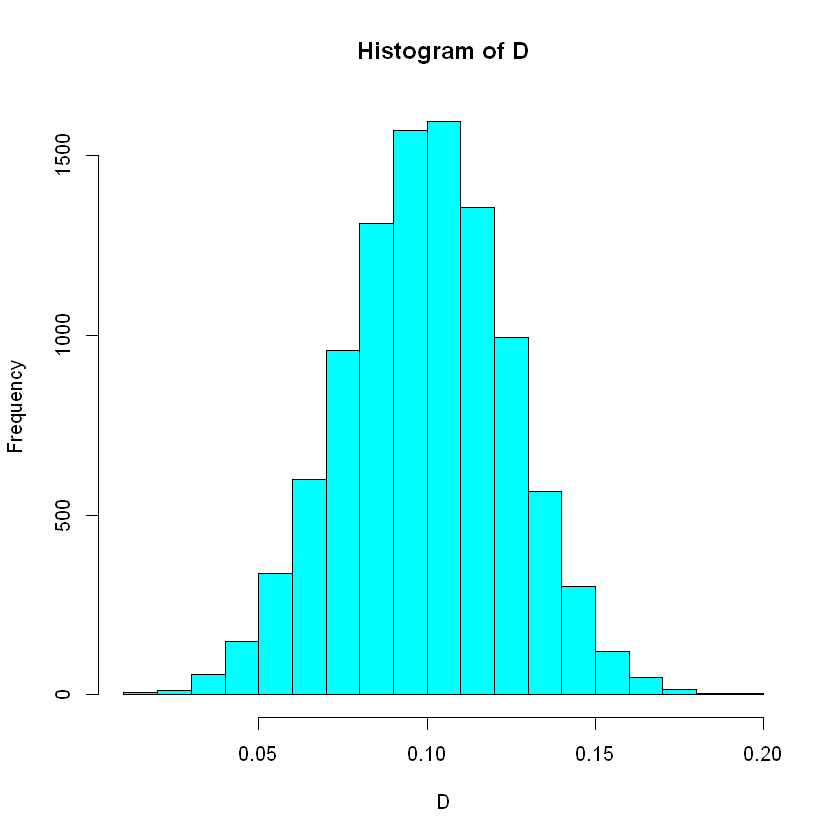

In [7]:
options(repr.plot.width=7,repr.plot.height=7)
hist(D,col="cyan")

#### Conclusions

The estimated probability of Dukakis getting larger support than Bush is vanishingly small:

In [8]:
sum(D<0)/N

[1] 0

# Case study 2: US 2008 election

#### Data and context

In the 2008 US presidential election the main contestants were Barack Obama and John McCain. 

The `election.2008` dataset in the `LearnBayes` package is a data frame with results of poll surveys on each of the 51 _states_ (50 states and the District of Columbia), in each of which 500 people were questioned. Results are registered as 51 observations on the following 4 variables: `State`, name of the state, `M.pct`, percentage of poll survey for McCain, `O.pct`, precentage of poll survey for Obama, `EV`, number of electoral votes (all of which are assigned to the winner in the state).

In [9]:
#install.packages("LearnBayes", repos= "https://cloud.r-project.org")
require(LearnBayes)

In [10]:
data(election.2008)
attach(election.2008)

#### Bayesian analysis of data

For each state data the procedure is exactly the same as in the previous example, applying a Dirichlet-Multinomial analysis.

To this end a `prob.Obama` function for a single state analysis is repeatedly called by means of the `sapply` function (see the R-Bloggers tutorial article [Using apply, sapply, lapply in R](https://www.r-bloggers.com/using-apply-sapply-lapply-in-r/)).

In [11]:
prob.Obama<-function(j){
    N<-5000                #number of simulations for Dirichlet posterior distributions
    alpha.prior<-c(1,1,1)
    sample.size<-500       #poll sample size in each state
    poll.props<-c(M.pct[j],O.pct[j],100-M.pct[j]-O.pct[j])/100
    poll.y<-sample.size*poll.props
    alpha.post<-alpha.prior+poll.y
    p<-rdirichlet(N,alpha.post)
    mean(p[,2]>p[,1])
    }

Obama.win.probs<-sapply(1:51,prob.Obama)

Now the resulting `Obama.win.probs` vector of estimated probabilities of winning in each of the 51 states is used to predict the actual number of electoral votes obtained, by simulating a binary Bernoulli variable for each state and summing up the result. Then this simulated election is performed `N1` times by means of the `replicate` function.

In [12]:
sim.election<-function(){
    winner<-rbinom(51,1,Obama.win.probs)  
    sum(EV*winner)         
    }
N1<-2000
sim.EV<-replicate(N1,sim.election())

Now we summarize the resulting list of predictions of the number of Obama's electoral votes, which we compare to the now known number in real-life election:

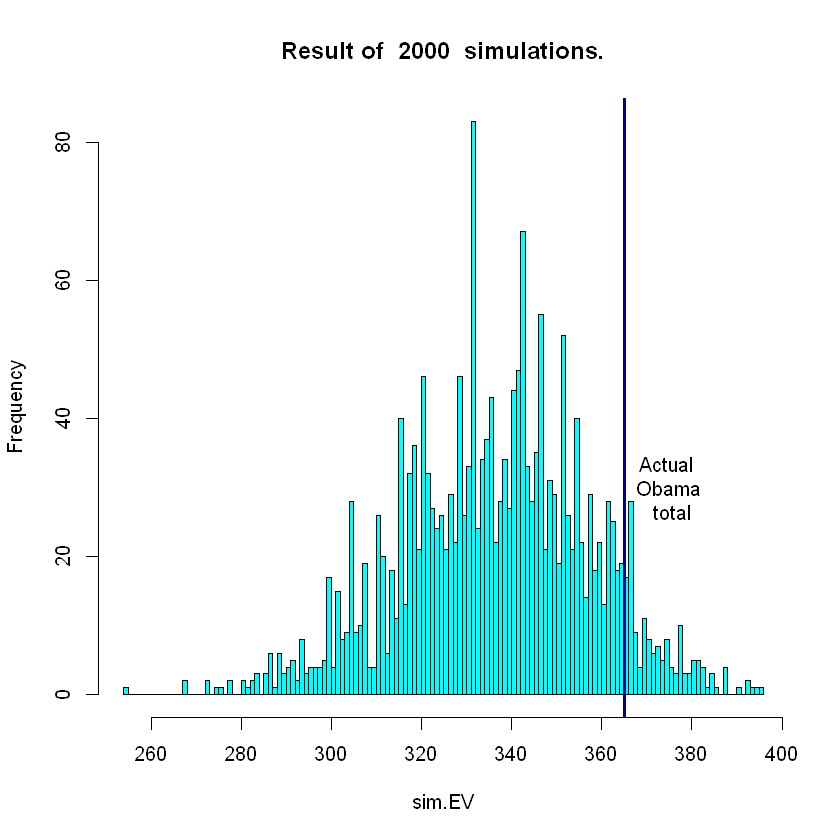

In [13]:
options(repr.plot.width=7,repr.plot.height=7)
hist(sim.EV,min(sim.EV):max(sim.EV),col="cyan",main=paste("Result of ",N1," simulations."))
abline(v=365,lwd=3,col="DarkBlue")  # Obama received 365 votes
text(375,30,"Actual \n Obama \n total")

# Case study 3: US 2012 election

You can check the following R-Bloggers entry, with accompanying complete working code, by C. W. Stevenson: [R Code for Election Posterior Distribution From a Random Sample](https://www.r-bloggers.com/r-code-for-election-posterior-distribution-from-a-random-sample/), where he uses the same functions as Jim Albert towards a Bayesian treament of election data, with slightly different notations and data from the US 2012 presidential election.

_Remark:_ Stevenson uses the `rdirichlet()` function from the `gtools` package to generate random Dirichlet samples. Apart from minor syntax quirks, this function is identical to the `rdirichlet()` function from the `LearnBayes` package. 

Both are based on the property that the sum of $k$ independently distributed Gamma distributions $X_1,\dots,X_k$ with the same rate parameter $\beta$ and shape parameters $\alpha_1,\dots,\alpha_k$, respectively, is another Gamma distribution:

$$
        S=\sum_{i=1}^{k}X_i \sim \operatorname{Gamma}(A,\beta),
        \quad\text{where }A=\sum_{i=1}^{k}\alpha_i,
$$

and, furthermore, the vector of the quotients:
    
$$
   \mathbf{Y}=(Y_1,\dots,Y_k)= (X_1/S,\dots,X_k/S)\sim\operatorname{Dirichlet}(\boldsymbol{\alpha}).
$$

has a $k$-dimensional Dirichlet distribution with vector parameter $\boldsymbol{\alpha}=(\alpha_1,\dots,\alpha_k)$.

In [14]:
#
# Insert here the article code and follow its computations.
#